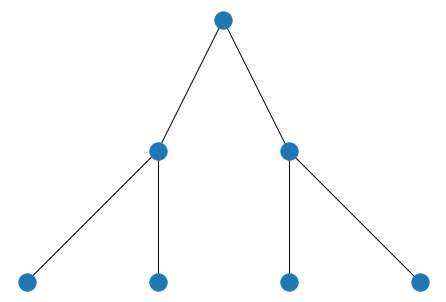

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 2)

pos = graphviz_layout(T, "dot")
nx.draw(T, pos)
plt.show()

In [2]:
def binary_tree(n):
    return nx.balanced_tree(2, n)

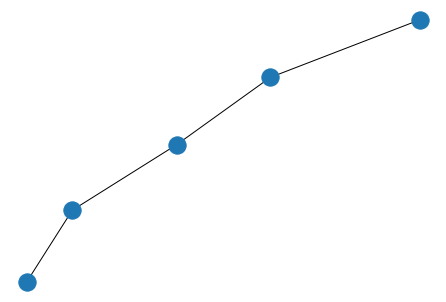

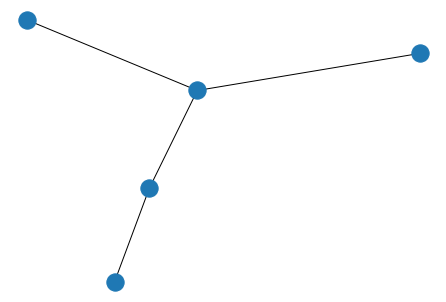

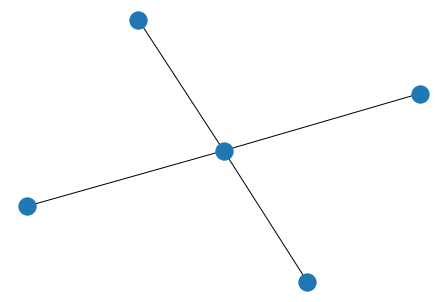

In [3]:
T = nx.nonisomorphic_trees(5)

for i, t in enumerate(T):
    plt.figure(i+1)
    pos = graphviz_layout(t)
    nx.draw(t, pos)
plt.show()

In [4]:
B = [binary_tree(i) for i in range(0, 10)]
for b in B:
    print(len(b.nodes()))

1
3
7
15
31
63
127
255
511
1023


[0, 1, 2]
[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


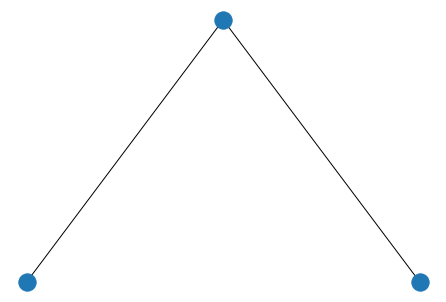

In [5]:
j=1
print(B[j].nodes())
print(nx.to_numpy_matrix(B[j]))
pos = graphviz_layout(B[j], "dot")
nx.draw(B[j], pos) 
plt.show()

In [6]:
def adgacency_matrix_binary_trees_by_edge(number_edges):
    n = 2 ** (number_edges + 1) - 1
    m = np.zeros((n+1, n+1))
    m[0][n] = 1
    m[n][0] = 1

    for i in range(n//2):
        m[i][i*2+1] = 1
        m[i][i*2+2] = 1
        m[i*2+1][i] = 1
        m[i*2+2][i] = 1
    return m


In [7]:
test_n = 13
%timeit adgacency_matrix_binary_trees_by_edge(test_n)
%timeit nx.to_numpy_matrix(binary_tree(test_n))

33.7 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.93 s ± 372 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
adgacency_matrix_binary_trees_by_edge(0)

array([[0., 1.],
       [1., 0.]])

In [129]:
class Operad:
    def __init__(self, n=0):
        self.colors = {f"c{i}": None for i in range(n)} or {}
        self.operations = {f"o{i}": None for i in range(n)} or {}

    def get_next_color(self, prop={}):
        for color, obj in self.colors.items():
            if not obj:
                self.colors[color] = prop or True
                return color
        color = f"c{len(self.colors)}"
        self.colors[color] = prop or True
        return color

    def get_next_operation(self, prop={}):
        for operation, obj in self.operations.items():
            if not obj:
                self.operations[operation] = prop or True
                return operation
        operation = f"o{len(self.operations)}"
        self.operations[operation] = prop or True
        return operation


class Tree:
    def __init__(self, depth=0, prop={}, operad=None):
        self.operad = Operad() if not operad else operad
        self.trunk = Edge(self.operad.get_next_color(), prop)
        self.branches = []
        self.depth = depth
        self.node = None

    def add_node(self, prop={}):
        self.node = Node(self.operad.get_next_operation(), prop)

    def add_branch(self, tree):
        self.branches.append(tree)

    def get_branch(self, index):
        return self.branches[index]

    def get_node(self):
        return self.node

    def __str__(self):
        return "".join(
            [f"{str(self.trunk)}\n"]
            + ["\t" * (self.depth + 1) + f"{str(branch)}\n" for branch in self.branches]
        )

    def print_edges(self):
        return "".join(
            [f"{str(self.trunk)}\n"]
            + [
                "\t" * (self.depth + 1) + f"{branch.print_edges()}\n"
                for branch in self.branches
            ]
        )

    def print_nodes(self):
        return "".join(
            [f"{str(self.node)}\n"]
            + [
                "\t" * (self.depth + 1) + f"{branch.print_nodes()}\n"
                for branch in self.branches
            ]
        )


class Node:
    def __init__(self, name, prop):
        self.name = name
        self.prop = prop

    def __str__(self):
        return self.name


class Edge:
    def __init__(self, name, prop):
        self.name = name
        self.prop = prop

    def __str__(self):
        return self.name


In [130]:
def regular_tree(n, k=1, depth=0, operad=None):
    t = Tree(depth, operad=operad)

    if n <= 0:
        return t
    t.add_node()

    for i in range(k):
        t.add_branch(regular_tree(n - 1, k, depth=depth + 1, operad=t.operad))

    return t


t = regular_tree(2, 2)
# print(t)

print(t.print_nodes())


TypeError: sequence item 1: expected str instance, NoneType found

In [128]:
import random

def regular_tree(n, k=1, depth=0, operad=None):
    t = Tree(depth, operad=operad)

    if n <= 0:
        return t
    t.add_node()

    for _ in range(random.randint(1,k)):
        t.add_branch(regular_tree(n - 1, k, depth=depth + 1, operad=t.operad))

    return t

t = regular_tree(2,3)

print(t)

c0
	c1
		c2

		c3

		c4


	c5
		c6


	c7
		c8





In [11]:
def _recursive_dict(n, k=1, name="e", depth=0):
    t = {"name": f"{name}-{depth}", "edges": []}
    
    if n <= 0:
        return t
    
    t["edges"] = [_recursive_dict(n-1, k, t.get("name"), depth+1) for _ in range(k)]

    return t


In [12]:
_recursive_dict(3, 2)

{'name': 'e-0',
 'edges': [{'name': 'e-0-1',
   'edges': [{'name': 'e-0-1-2',
     'edges': [{'name': 'e-0-1-2-3', 'edges': []},
      {'name': 'e-0-1-2-3', 'edges': []}]},
    {'name': 'e-0-1-2',
     'edges': [{'name': 'e-0-1-2-3', 'edges': []},
      {'name': 'e-0-1-2-3', 'edges': []}]}]},
  {'name': 'e-0-1',
   'edges': [{'name': 'e-0-1-2',
     'edges': [{'name': 'e-0-1-2-3', 'edges': []},
      {'name': 'e-0-1-2-3', 'edges': []}]},
    {'name': 'e-0-1-2',
     'edges': [{'name': 'e-0-1-2-3', 'edges': []},
      {'name': 'e-0-1-2-3', 'edges': []}]}]}]}